In [4]:
import os
import requests
import io
import logging
from typing import Literal, Optional
from PIL import Image
import uuid
from datetime import datetime

logging.basicConfig(level=logging.INFO)

In [10]:
class ImageGenerater:
    def __init__(self, asset_suggestions: dict) -> None:
        self.asset_suggestions = asset_suggestions

    @staticmethod
    def generate_image(prompt: str) -> Optional[Image.Image]:
        try:
            API_URL = "https://api-inference.huggingface.co/models/prompthero/openjourney-v4"
            api_key = os.getenv("OPENJOURNEY_API_KEY")
            headers = {"Authorization":"Bearer {OPENJOURNEY_API_KEY}"}
            # print(headers)
            payload = {
                "inputs": prompt
            }
            response = requests.post(API_URL, headers=headers, json=payload)
            image = Image.open(io.BytesIO(response.content))
            return image
        except Exception as e:
            logging.error(f"Failed to generate image: {e}")
            return None


    @staticmethod
    def download_image(image_bytes: bytes, save_path: str) -> str:
        try:
            if not os.path.exists(save_path):
                os.makedirs(save_path) 

            if image_bytes:
                timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
                unique_id = uuid.uuid4().hex[:6]  
                filename = f"image_{timestamp}_{unique_id}.jpg"
                save_file_path = os.path.join(save_path, filename)
                with open(save_file_path, "wb") as f:
                    f.write(image_bytes)

                logging.info(f"Image saved to {save_file_path}")
                # os.system(f"cmd.exe /C start ubuntu/home/nati/Semantic-Image-and-Text-Alignment/image-and-text-generation/image.jpg")
                # os.startfile(save_file_path)
                return save_file_path
            else:
                raise RuntimeError("No image data provided.")
        except Exception as e:
            raise RuntimeError(f"Failed to save image: {e}") from e


    def generate_images(self, store_location: str ='./../generated-assets') -> dict:
        generated_images = {}
        for frame, elements in self.asset_suggestions.items():
            if frame.startswith('frame'):
                generated_images[frame] = []
                for type, description in elements.items():
                    generated_image = self.generate_image(description)
                    if generated_image:
                        # generated_image.show()
                        saved_image_path = self.download_image(generated_image.tobytes(), store_location)
                        generated_images[frame].append((type, saved_image_path))
                        generated_image.show()
                        
        return generated_images


INFO:root:Image saved to ./../generated-assets/image_20240216111619_1d843a.jpg


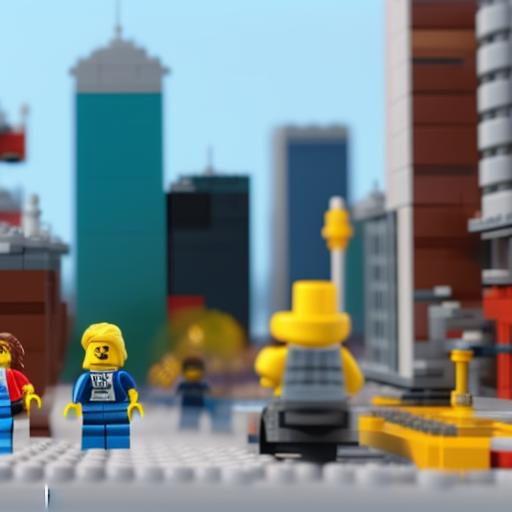

INFO:root:Image saved to ./../generated-assets/image_20240216111620_01c9e8.jpg


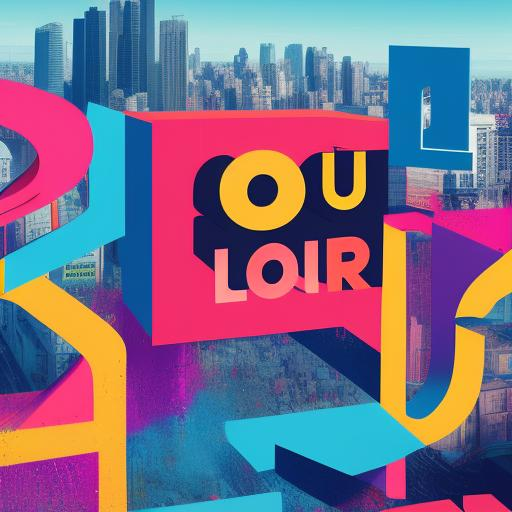

INFO:root:Image saved to ./../generated-assets/image_20240216111621_e4f278.jpg


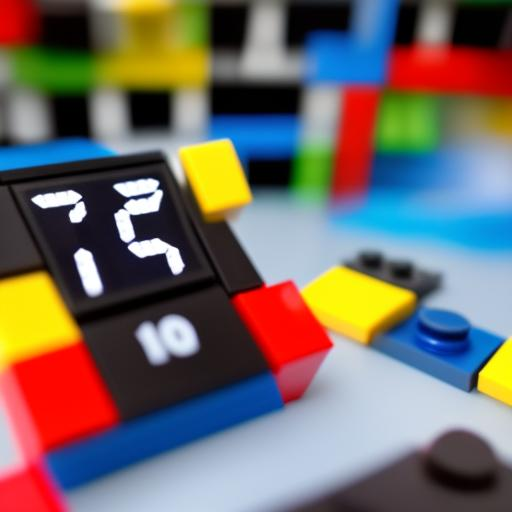

INFO:root:Image saved to ./../generated-assets/image_20240216111622_4c0c70.jpg


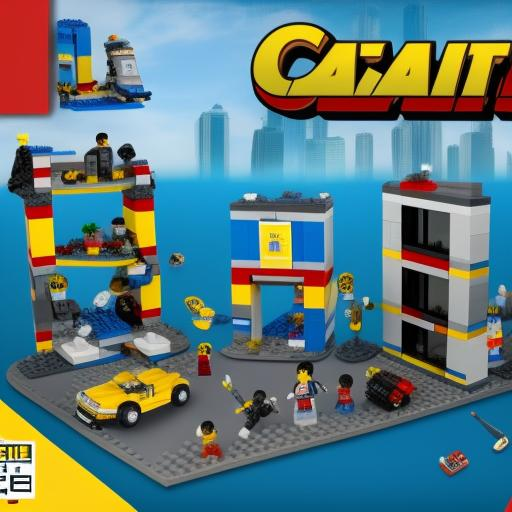

INFO:root:Image saved to ./../generated-assets/image_20240216111623_0b91ea.jpg


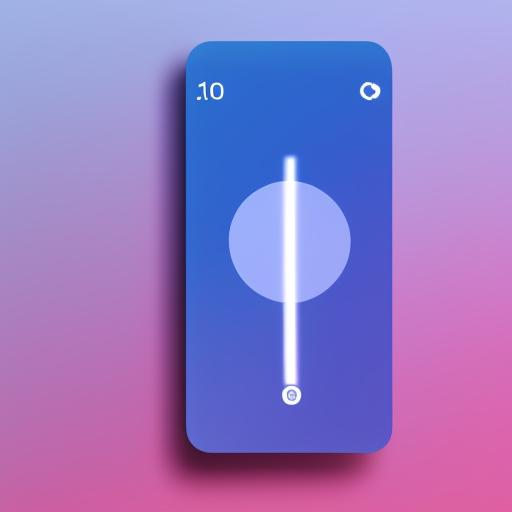

INFO:root:Image saved to ./../generated-assets/image_20240216111624_f3092e.jpg


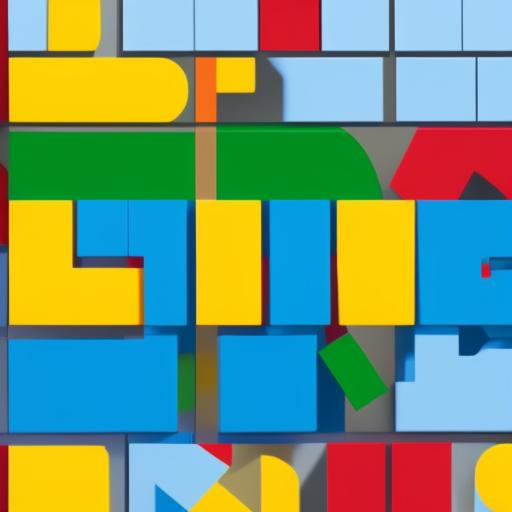

INFO:root:Image saved to ./../generated-assets/image_20240216111625_b6f8ec.jpg


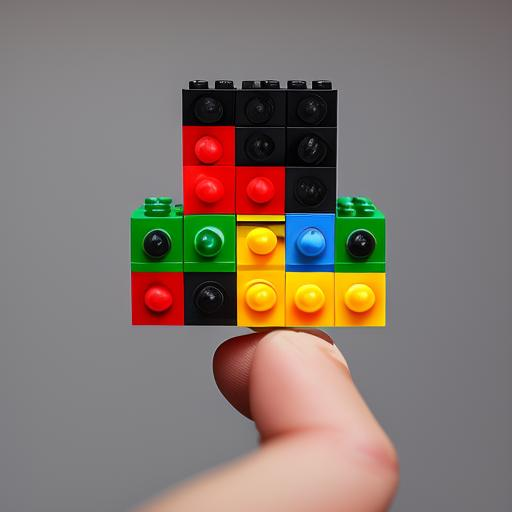

{'frame_1': [('Background Animation', './../generated-assets/image_20240216111619_1d843a.jpg'), ('Tagline', './../generated-assets/image_20240216111620_01c9e8.jpg'), ('Countdown Timer', './../generated-assets/image_20240216111621_e4f278.jpg')], 'frame_2': [('Video Clips', './../generated-assets/image_20240216111622_4c0c70.jpg'), ('Swipe Indicator', './../generated-assets/image_20240216111623_0b91ea.jpg')], 'frame_3': [('Logo', './../generated-assets/image_20240216111624_f3092e.jpg'), ('CTA Button', './../generated-assets/image_20240216111625_b6f8ec.jpg')]}


In [11]:
if __name__ == "__main__":
    asset_suggestions = {
            "frame_1": {
                "Background Animation": "A suspenseful animation of a LEGO CITY set, with buildings, vehicles, and mini-figures coming to life in a dynamic, 3D environment. The animation is designed to captivate the viewer's attention and set the stage for the upcoming challenge.",
                "Tagline": "'YOUR CITY, NO LIMITS' appears in bold, vibrant letters, reinforcing the campaign's theme of boundless creativity and adventure.",
                "Countdown Timer": "A digital countdown timer, styled to resemble LEGO bricks, adds an element of suspense and anticipation, building up to the reveal of the 'ULTIMATE ESCAPE CHALLENGE'."
            },
            "frame_2": {
                "Video Clips": "A series of quick, exciting clips showcasing various challenges in the 'ULTIMATE ESCAPE CHALLENGE'. Each clip features different LEGO CITY sets and mini-figures, highlighting the diversity and expansiveness of the LEGO CITY universe.",
                "Swipe Indicator": "A subtle, animated swipe indicator encourages viewers to interact with the ad and explore the different challenges."
            },
            "frame_3": {
                "Logo": "The LEGO CITY 2024 logo, designed with the iconic LEGO brick pattern, reinforces brand recognition and ties the ad back to the product line.",
                "CTA Button": "A 'Play Now' button, styled to resemble a LEGO brick, invites users to join the challenge on the LEGO website. The button is strategically placed to be easily noticeable and accessible, encouraging viewers to take immediate action."
            },
            "explanation": "This variation aligns with the creative brief by effectively promoting the LEGO CITY 2024 product line and the 'ULTIMATE ESCAPE CHALLENGE'. The suspenseful animation and countdown timer in the first frame capture the viewer's attention and set the stage for the challenge. The quick, exciting clips in the second frame showcase the diversity and expansiveness of the LEGO CITY universe, appealing to the target audience's interest in games and challenges. The LEGO CITY 2024 logo and 'Play Now' button in the final frame reinforce brand recognition and drive traffic to the brand's website, achieving the campaign's objectives of enhancing audience engagement and increasing product and brand awareness."
        }
    

    test = ImageGenerater(asset_suggestions)
    generated_images = test.generate_images()
    print(generated_images)
    